In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("loan.csv")
import seaborn as sns
from sklearn import preprocessing

import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("font", size=10)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

C:\Users\HP\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [3]:
numerical1 = data.dtypes[data.dtypes == int].index

print(numerical1)

Index([], dtype='object')


In [4]:
numerical = data.dtypes[data.dtypes == float].index

print(numerical)

Index(['funded_amnt_inv', 'installment', 'annual_inc', 'dti',
       'mths_since_last_delinq', 'mths_since_last_record', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_

In [4]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
data.shape

(39717, 111)

In [6]:
categorical = data.dtypes[data.dtypes == "object"].index

print(categorical)

Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status',
       'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d',
       'application_type'],
      dtype='object')


In [7]:
data[categorical].describe

<bound method NDFrame.describe of              term int_rate grade sub_grade  \
0       36 months   10.65%     B        B2   
1       60 months   15.27%     C        C4   
2       36 months   15.96%     C        C5   
3       36 months   13.49%     C        C1   
4       60 months   12.69%     B        B5   
5       36 months    7.90%     A        A4   
6       60 months   15.96%     C        C5   
7       36 months   18.64%     E        E1   
8       60 months   21.28%     F        F2   
9       60 months   12.69%     B        B5   
10      60 months   14.65%     C        C3   
11      36 months   12.69%     B        B5   
12      36 months   13.49%     C        C1   
13      36 months    9.91%     B        B1   
14      36 months   10.65%     B        B2   
15      36 months   16.29%     D        D1   
16      36 months   15.27%     C        C4   
17      36 months    6.03%     A        A1   
18      36 months   11.71%     B        B3   
19      36 months    6.03%     A        A1   


In [8]:
data.apply(lambda x: sum(x.isnull()))

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [9]:
data = data.drop(data.columns[data.apply(lambda col: col.isnull().sum()/len(data) > 0.5)], axis=1)

In [10]:
data.shape

(39717, 54)

In [11]:
data.apply(lambda x: sum(x.isnull()))

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [12]:
data = data.dropna(axis=0,subset =['id'])
data = data.dropna(axis=0,subset =['member_id'])
data = data.dropna(axis=0,subset =['desc'])
data = data.dropna(axis=0,subset =['emp_title'])




In [13]:
data.shape

(25173, 54)

In [14]:
data.apply(lambda x: sum(x.isnull()))

id                              0
member_id                       0
loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
term                            0
int_rate                        0
installment                     0
grade                           0
sub_grade                       0
emp_title                       0
emp_length                     38
home_ownership                  0
annual_inc                      0
verification_status             0
issue_d                         0
loan_status                     0
pymnt_plan                      0
url                             0
desc                            0
purpose                         0
title                           5
zip_code                        0
addr_state                      0
dti                             0
delinq_2yrs                     0
earliest_cr_line                0
inq_last_6mths                  0
open_acc                        0
pub_rec       

In [15]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,1313.76,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,111.34,Dec-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [16]:
data.shape

(25173, 54)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25173 entries, 1 to 39716
Data columns (total 54 columns):
id                            25173 non-null int64
member_id                     25173 non-null int64
loan_amnt                     25173 non-null int64
funded_amnt                   25173 non-null int64
funded_amnt_inv               25173 non-null float64
term                          25173 non-null object
int_rate                      25173 non-null object
installment                   25173 non-null float64
grade                         25173 non-null object
sub_grade                     25173 non-null object
emp_title                     25173 non-null object
emp_length                    25135 non-null object
home_ownership                25173 non-null object
annual_inc                    25173 non-null float64
verification_status           25173 non-null object
issue_d                       25173 non-null object
loan_status                   25173 non-null object
pymnt_pl

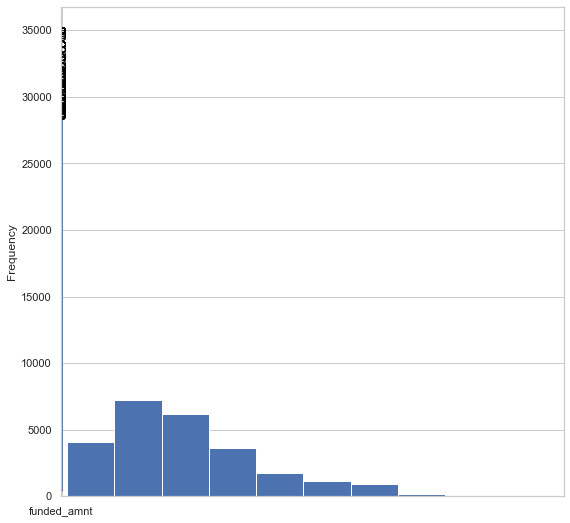

In [18]:
data["funded_amnt"].plot(kind="box", figsize=(9,9))
data["installment"].plot(kind="hist", figsize=(9,9))


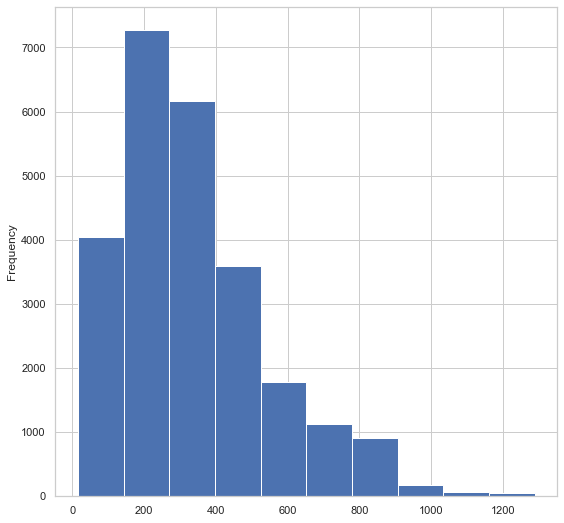

In [19]:
data["installment"].plot(kind="hist", figsize=(9,9))

In [20]:
data['pub_rec'].value_counts()

0    23857
1     1275
2       35
3        6
Name: pub_rec, dtype: int64

In [21]:
data['emp_length'].value_counts()

10+ years    5506
2 years      3034
< 1 year     2940
3 years      2710
1 year       2308
4 years      2216
5 years      2102
6 years      1397
7 years      1151
8 years       945
9 years       826
Name: emp_length, dtype: int64

In [22]:
data['chargeoff_within_12_mths'].value_counts()

0.0    25129
Name: chargeoff_within_12_mths, dtype: int64

In [23]:
data=data.drop(['chargeoff_within_12_mths'] , axis=1)

In [24]:
data.shape

(25173, 53)

In [25]:
data['collections_12_mths_ex_med'].value_counts()

0.0    25129
Name: collections_12_mths_ex_med, dtype: int64

In [26]:
data=data.drop(['collections_12_mths_ex_med'] , axis=1)

In [27]:
data['loan_status'].value_counts()

Fully Paid     20996
Charged Off     3497
Current          680
Name: loan_status, dtype: int64

In [28]:
data["pub_rec_bankruptcies"].value_counts()

0.0    23510
1.0     1008
2.0        4
Name: pub_rec_bankruptcies, dtype: int64

In [29]:
data["pub_rec_bankruptcies"] =data["pub_rec_bankruptcies"].fillna(data["pub_rec_bankruptcies"].median())


In [30]:
numerical = data.dtypes[data.dtypes == float]

print(numerical)

funded_amnt_inv            float64
installment                float64
annual_inc                 float64
dti                        float64
out_prncp                  float64
out_prncp_inv              float64
total_pymnt                float64
total_pymnt_inv            float64
total_rec_prncp            float64
total_rec_int              float64
total_rec_late_fee         float64
recoveries                 float64
collection_recovery_fee    float64
last_pymnt_amnt            float64
pub_rec_bankruptcies       float64
tax_liens                  float64
dtype: object


In [31]:
data["tax_liens"].value_counts()

0.0    25144
Name: tax_liens, dtype: int64

In [32]:
data["tax_liens"] =data["tax_liens"].fillna(data["tax_liens"].median())



In [33]:
data = data.drop(data.columns[data.apply(lambda y :y.value_counts==0)],axis=1)

In [34]:
data.shape

(25173, 52)

In [35]:
data["delinq_amnt"].value_counts()

0    25173
Name: delinq_amnt, dtype: int64

In [36]:
data["delinq_amnt"] =data["delinq_amnt"].fillna(data["delinq_amnt"].median())


In [37]:
data["acc_now_delinq"].value_counts()



0    25173
Name: acc_now_delinq, dtype: int64

In [38]:
data["acc_now_delinq"] =data["acc_now_delinq"].fillna(data["acc_now_delinq"].median())


In [39]:
data.apply(lambda x: sum(x.isnull()))

id                          0
member_id                   0
loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title                   0
emp_length                 38
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
pymnt_plan                  0
url                         0
desc                        0
purpose                     0
title                       5
zip_code                    0
addr_state                  0
dti                         0
delinq_2yrs                 0
earliest_cr_line            0
inq_last_6mths              0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                 33
total_acc                   0
initial_li

In [40]:
data["acc_now_delinq"] =data["acc_now_delinq"].fillna(data["acc_now_delinq"].median())



In [41]:
data["open_acc"] =data["open_acc"].fillna(data["open_acc"].mean())
data["total_acc"] =data["total_acc"].fillna(data["total_acc"].mean())
data["delinq_2yrs"] =data["delinq_2yrs"].fillna(data["delinq_2yrs"].median())


In [42]:
data["open_acc"].value_counts()
data["delinq_2yrs"].value_counts()


0     22462
1      2093
2       418
3       149
4        32
5        10
6         6
7         2
11        1
Name: delinq_2yrs, dtype: int64

In [43]:
data["emp_length"].value_counts()

10+ years    5506
2 years      3034
< 1 year     2940
3 years      2710
1 year       2308
4 years      2216
5 years      2102
6 years      1397
7 years      1151
8 years       945
9 years       826
Name: emp_length, dtype: int64

In [44]:
data["emp_length"] =data["emp_length"].fillna("10+ years")


In [45]:
print(categorical)

Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status',
       'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d',
       'application_type'],
      dtype='object')


In [46]:
data.apply(lambda y :sum(y.isnull()))

id                          0
member_id                   0
loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title                   0
emp_length                  0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
pymnt_plan                  0
url                         0
desc                        0
purpose                     0
title                       5
zip_code                    0
addr_state                  0
dti                         0
delinq_2yrs                 0
earliest_cr_line            0
inq_last_6mths              0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                 33
total_acc                   0
initial_li

In [47]:
data["purpose"].value_counts()

debt_consolidation    12044
credit_card            3256
other                  2549
home_improvement       1831
major_purchase         1364
small_business         1088
car                     913
wedding                 614
medical                 409
moving                  321
educational             267
house                   260
vacation                198
renewable_energy         59
Name: purpose, dtype: int64

In [48]:
data["purpose"] =data["purpose"].fillna("debt_consolidation")


In [49]:
data["title"].value_counts()

Debt Consolidation                        1409
Debt Consolidation Loan                    949
Personal Loan                              423
Consolidation                              316
debt consolidation                         281
Credit Card Consolidation                  233
Home Improvement                           216
Debt consolidation                         207
Consolidation Loan                         177
Personal                                   176
Credit Card Loan                           162
personal loan                              157
Small Business Loan                        153
Home Improvement Loan                      133
personal                                   128
Loan                                       119
consolidation                              114
Wedding Loan                               114
Credit Card Payoff                          93
Car Loan                                    92
Wedding                                     90
Other Loan   

In [50]:
data["title"] =data["title"].fillna("Debt Consolidation")

In [51]:
data["revol_util"].value_counts()

0%        594
0.20%      43
46.40%     43
66.70%     43
63%        42
44.70%     41
88%        41
89.50%     40
72.10%     39
34.40%     39
66.60%     39
51.60%     39
52.30%     39
48%        38
48.70%     38
51.10%     38
39%        38
30.10%     37
57.70%     37
41%        37
65.90%     37
48.20%     37
37.60%     37
66.80%     37
19.80%     36
62.80%     36
25.50%     36
46.60%     36
49.60%     36
30.90%     36
         ... 
8.01%       1
33.29%      1
58.19%      1
21.59%      1
0.54%       1
60.69%      1
5.34%       1
34.89%      1
10.17%      1
38.77%      1
37.63%      1
37.73%      1
7.28%       1
69.98%      1
11.63%      1
29.53%      1
49.69%      1
0.83%       1
7.43%       1
5.33%       1
0.75%       1
54.22%      1
17.71%      1
24.66%      1
0.86%       1
57.56%      1
32.71%      1
10.61%      1
8.49%       1
27.81%      1
Name: revol_util, Length: 1049, dtype: int64

In [52]:
data["revol_util"] =data["revol_util"].fillna("0%")

In [53]:
data.shape

(25173, 52)

In [54]:
data.apply(lambda a:sum(a.isnull()))

id                          0
member_id                   0
loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title                   0
emp_length                  0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
pymnt_plan                  0
url                         0
desc                        0
purpose                     0
title                       0
zip_code                    0
addr_state                  0
dti                         0
delinq_2yrs                 0
earliest_cr_line            0
inq_last_6mths              0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                  0
total_acc                   0
initial_li

In [55]:
data["pub_rec"].value_counts()

0    23857
1     1275
2       35
3        6
Name: pub_rec, dtype: int64

In [56]:
data["pub_rec"]= data["pub_rec"].fillna(data["pub_rec"].mean())

In [57]:
data =data.drop(['last_pymnt_d','last_credit_pull_d','inq_last_6mths','earliest_cr_line'],axis=1)

In [58]:
print(categorical)

Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status',
       'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d',
       'application_type'],
      dtype='object')


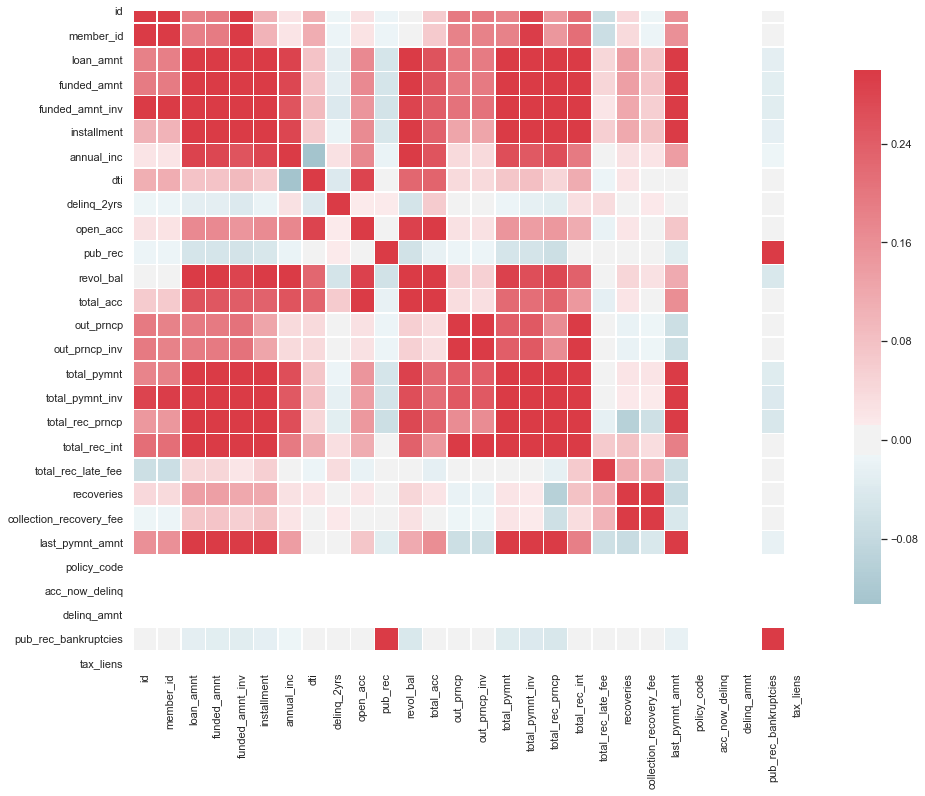

In [59]:
corr = data.corr()
plt.figure(figsize = (16,12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})


In [60]:
data2 = pd.get_dummies(data, columns =['term', 'int_rate', 'grade', 'sub_grade', 
       'emp_length', 'home_ownership', 'verification_status', 
       'loan_status', 'pymnt_plan'])

In [61]:
print(data2)

            id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
1      1077430    1314167       2500         2500       2500.00000   
3      1076863    1277178      10000        10000      10000.00000   
4      1075358    1311748       3000         3000       3000.00000   
6      1069639    1304742       7000         7000       7000.00000   
7      1072053    1288686       3000         3000       3000.00000   
9      1071570    1306721       5375         5375       5350.00000   
10     1070078    1305201       6500         6500       6500.00000   
12     1064687    1298717       9000         9000       9000.00000   
13     1069866    1304956       3000         3000       3000.00000   
17     1069971    1304884       3600         3600       3600.00000   
18     1062474    1294539       6000         6000       6000.00000   
20     1069740    1284848      20250        20250      19142.16108   
21     1039153    1269083      21000        21000      21000.00000   
22     1069710    13

In [62]:
data2.shape

(25173, 471)

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [64]:
X_features = data[['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs',
        'open_acc', 'pub_rec', 'revol_bal', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 
        'policy_code', 'acc_now_delinq', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens']].values

In [65]:
Y_target = data['loan_status'].values


In [66]:
X_train , X_test , Y_train ,Y_test =model_selection.train_test_split(X_features,Y_target,test_size = 0.2,random_state=42)

In [67]:
linearmodel=LogisticRegression()
linearmodel.fit(X_train,Y_train)

C:\Users\HP\Miniconda3\orange\envs\DL_ENV\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Miniconda3\orange\envs\DL_ENV\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
my_prediction = linearmodel.predict(X_test)

In [69]:
my_prediction = linearmodel.predict(X_test)

In [70]:
print(my_prediction)

['Fully Paid' 'Fully Paid' 'Fully Paid' ... 'Fully Paid' 'Fully Paid'
 'Fully Paid']


In [71]:
linearmodel.classes_

array(['Charged Off', 'Current', 'Fully Paid'], dtype=object)

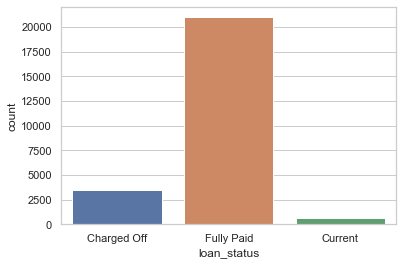

In [72]:
sns.countplot(x="loan_status",data=data)
plt.show()

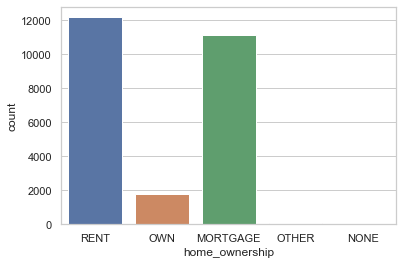

In [73]:
sns.countplot(x="home_ownership",data=data)

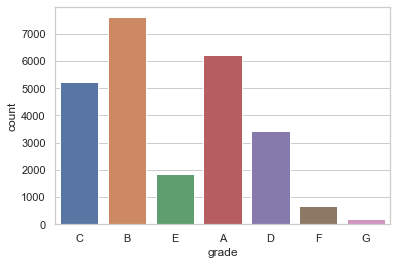

In [74]:
sns.countplot(x="grade",data= data)

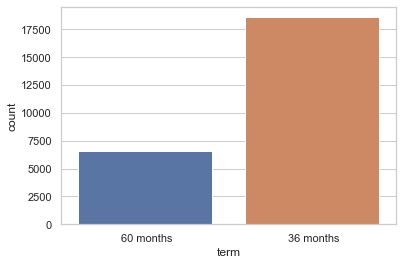

In [75]:
sns.countplot(x="term",data= data)

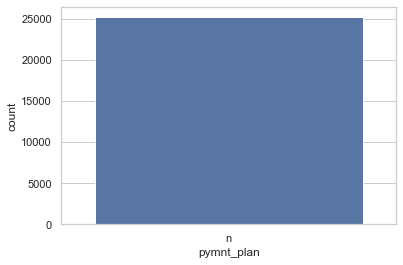

In [76]:
sns.countplot(x="pymnt_plan",data=data)

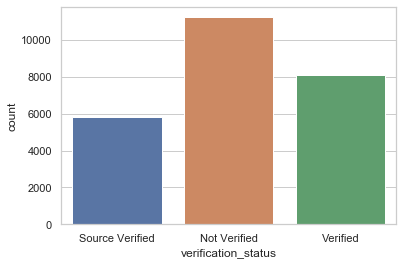

In [77]:
sns.countplot(x="verification_status",data=data)

In [78]:
data["verification_status"][data["verification_status"] == "Source Verified"] = 0
data["verification_status"][data["verification_status"] == "Not Verified"] = 1
data["verification_status"][data["verification_status"] == "Verified"] = 2


data["term"][data["term"] == "36months"] = 0
data["term"][data["term"] == "60months"] = 1

data["grade"][data["grade"] == "A"] = 0
data["grade"][data["grade"] == "B"] = 1
data["grade"][data["grade"] == "C"] = 2
data["grade"][data["grade"] == "D"] = 3

data["grade"][data["grade"] == "E"] = 4
data["grade"][data["grade"] == "F"] = 5

data["grade"][data["grade"] == "G"] = 6



data["home_ownership"][data["home_ownership"] == "RENT"] = 0
data["home_ownership"][data["home_ownership"] == "MORTGAGE"] = 1
data["home_ownership"][data["home_ownership"] == "OWN"] = 2
data["home_ownership"][data["home_ownership"] == "OTHER"] = 3
data["home_ownership"][data["home_ownership"] == "NONE"] = 4

data["pymnt_plan"][data["pymnt_plan"] == "n"] = 0
data["pymnt_plan"][data["pymnt_plan"] == "y"] = 1


C:\Users\HP\Miniconda3\orange\envs\DL_ENV\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\HP\Miniconda3\orange\envs\DL_ENV\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\HP\Miniconda3\orange\envs\DL_ENV\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so w

In [79]:
model4=KNeighborsClassifier(n_neighbors=5)
X_features_new=data[[ 'grade', 'home_ownership', 'verification_status','pymnt_plan','loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',  'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt',  'policy_code', 'acc_now_delinq', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens']].values
Y_new_target=data['loan_status'].values
X_train , X_test , Y_train ,Y_test =model_selection.train_test_split(X_features_new,Y_new_target,test_size = 0.2,random_state=42)

In [80]:
model=model4.fit(X_train,Y_train)
Y_predictions=model4.predict(X_test)

In [81]:
data['home_ownership'].value_counts()

0    12181
1    11110
2     1785
3       96
4        1
Name: home_ownership, dtype: int64

In [82]:
print(Y_predictions)
from sklearn import metrics

['Fully Paid' 'Fully Paid' 'Fully Paid' ... 'Fully Paid' 'Fully Paid'
 'Fully Paid']


In [83]:
m_acc = metrics.accuracy_score(Y_test, Y_predictions)

print("Accuracy:",m_acc)

Accuracy: 0.9392254220456803


In [84]:
data['pymnt_plan'].value_counts()

0    25173
Name: pymnt_plan, dtype: int64

In [85]:
X_features_new=data[[ 'grade', 'home_ownership', 'verification_status','pymnt_plan','loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'policy_code', 'acc_now_delinq', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens']].values
Y_new_target=data['loan_status'].values
model5=DecisionTreeClassifier(max_depth=13)
X_train , X_test , Y_train ,Y_test =model_selection.train_test_split(X_features_new,Y_new_target,test_size = 0.2,random_state=42)

In [86]:
model5.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=13,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [87]:
Y_predictions1=model5.predict(X_test)

In [88]:
m_acc = metrics.accuracy_score(Y_test, Y_predictions1)

print("Accuracy:",m_acc)

Accuracy: 0.9950347567030785


In [89]:
from sklearn.ensemble import RandomForestClassifier
X_features_new=data[[ 'grade', 'home_ownership', 'verification_status','pymnt_plan','loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',  'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'policy_code', 'acc_now_delinq', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens']].values
Y_new_target=data['loan_status'].values
model5=DecisionTreeClassifier(max_depth=13)
X_train , X_test , Y_train ,Y_test =model_selection.train_test_split(X_features_new,Y_new_target,test_size = 0.2,random_state=42)

In [90]:
forest = RandomForestClassifier(max_depth = 10, min_samples_split=2, n_estimators = 100, random_state = 1)
forest.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [91]:
 Y_predictions2 = forest.predict(X_test)

In [92]:
m_acc = metrics.accuracy_score(Y_test,Y_predictions2)

In [93]:
print("Accuracy:",m_acc)

Accuracy: 0.9930486593843099


In [94]:
print(metrics.classification_report(y_true=Y_test,
                              y_pred=Y_predictions2) )

              precision    recall  f1-score   support

 Charged Off       1.00      0.95      0.97       693
     Current       1.00      1.00      1.00       141
  Fully Paid       0.99      1.00      1.00      4201

    accuracy                           0.99      5035
   macro avg       1.00      0.98      0.99      5035
weighted avg       0.99      0.99      0.99      5035



In [95]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_predictions2,Y_test)

In [96]:
print(confusion_matrix)

[[ 658    0    0]
 [   0  141    0]
 [  35    0 4201]]


In [97]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
print(cross_val_score(forest, X_features_new, Y_new_target,cv=10))

[0.99404289 0.99563145 0.99285147 0.99523431 0.99364575 0.99205719
 0.99245133 0.99324324 0.99205087 0.9809221 ]


In [98]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


In [99]:
def plot_learning_curve(estimator, title, X_features_new, Y_new_target, ylim=None, cv=None,n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
  
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X_features_new, Y_new_target, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")



C:\Users\HP\Miniconda3\orange\envs\DL_ENV\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Attempting to set identical bottom == top == 1 results in singular transformations; automatically expanding.
  


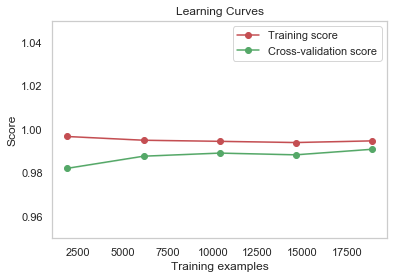

In [105]:
title = "Learning Curves"
cv = ShuffleSplit(n_splits=1, test_size=0.25, random_state=12)
estimator = forest
plot_learning_curve(estimator, title, X_features_new, Y_new_target, (1,1), cv=cv, n_jobs=10)

plt.show()

In [235]:
data.corr()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,open_acc,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens
id,1.000000,0.993207,0.184529,0.193145,0.317277,0.104042,0.021406,0.108830,-0.012797,0.026780,...,0.212690,-0.067123,0.039939,-0.012171,0.157421,NaN,NaN,NaN,0.002279,NaN
member_id,0.993207,1.000000,0.185373,0.193236,0.329312,0.100886,0.022307,0.110671,-0.013267,0.024352,...,0.214147,-0.069040,0.038148,-0.013301,0.158874,NaN,NaN,NaN,0.002715,NaN
loan_amnt,0.184529,0.185373,1.000000,0.978639,0.920073,0.924054,0.284073,0.075659,-0.029061,0.171066,...,0.725120,0.042704,0.134618,0.072550,0.437418,NaN,NaN,NaN,-0.029922,NaN
funded_amnt,0.193145,0.193236,0.978639,1.000000,0.940629,0.953626,0.276885,0.075811,-0.029938,0.169249,...,0.735357,0.044754,0.135598,0.074341,0.440716,NaN,NaN,NaN,-0.031508,NaN
funded_amnt_inv,0.317277,0.329312,0.920073,0.940629,1.000000,0.878626,0.257126,0.088432,-0.039646,0.151346,...,0.724134,0.019657,0.119376,0.057609,0.427991,NaN,NaN,NaN,-0.034390,NaN
installment,0.104042,0.100886,0.924054,0.953626,0.878626,1.000000,0.279420,0.061567,-0.017266,0.167626,...,0.628368,0.057875,0.117373,0.077139,0.385157,NaN,NaN,NaN,-0.028320,NaN
annual_inc,0.021406,0.022307,0.284073,0.276885,0.257126,0.279420,1.000000,-0.133408,0.027504,0.173688,...,0.193821,0.003971,0.028469,0.023410,0.136788,NaN,NaN,NaN,-0.012549,NaN
dti,0.108830,0.110671,0.075659,0.075811,0.088432,0.061567,-0.133408,1.000000,-0.039418,0.282220,...,0.112924,-0.014999,0.022953,0.005861,0.010401,NaN,NaN,NaN,0.001316,NaN
delinq_2yrs,-0.012797,-0.013267,-0.029061,-0.029938,-0.039646,-0.017266,0.027504,-0.039418,1.000000,0.012625,...,0.031309,0.037425,0.008707,0.015373,-0.009016,NaN,NaN,NaN,0.003815,NaN
open_acc,0.026780,0.024352,0.171066,0.169249,0.151346,0.167626,0.173688,0.282220,0.012625,1.000000,...,0.114793,-0.018382,0.019624,0.009434,0.072525,NaN,NaN,NaN,0.009923,NaN


In [236]:
data.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,2,C4,...,0.00,117.08,1.11,119.66,1,INDIVIDUAL,0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,2,C1,...,16.97,0.00,0.00,357.48,1,INDIVIDUAL,0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,1,B5,...,0.00,0.00,0.00,67.79,1,INDIVIDUAL,0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,2,C5,...,0.00,0.00,0.00,1313.76,1,INDIVIDUAL,0,0,0.0,0.0
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,4,E1,...,0.00,0.00,0.00,111.34,1,INDIVIDUAL,0,0,0.0,0.0


In [237]:
from sklearn.naive_bayes import GaussianNB

In [239]:
model6 =GaussianNB()
X_features_new=data[[ 'grade', 'home_ownership', 'verification_status','pymnt_plan','loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt',  'policy_code', 'acc_now_delinq', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens']].values
Y_new_target=data['loan_status'].values
X_train , X_test , Y_train ,Y_test =model_selection.train_test_split(X_features_new,Y_new_target,test_size = 0.2,random_state=42)

In [240]:
model6.fit(X_train,Y_train)


GaussianNB(priors=None)

In [241]:
Y_predictions3 = model6.predict(X_test)

In [242]:
print(Y_predictions3)

['Fully Paid' 'Fully Paid' 'Fully Paid' ... 'Fully Paid' 'Fully Paid'
 'Fully Paid']


In [243]:
m_acc = metrics.accuracy_score(Y_test,Y_predictions3)

In [244]:
print(m_acc)

0.9571002979145978


In [246]:
y_prob=forest.predict_proba(X=X_test)

In [247]:
print(y_prob)

[[1.19648406e-02 3.67610666e-04 9.87667549e-01]
 [5.22095493e-03 0.00000000e+00 9.94779045e-01]
 [4.62062194e-03 2.06593422e-04 9.95172785e-01]
 ...
 [3.48826095e-03 2.49172497e-04 9.96262567e-01]
 [8.39151773e-03 0.00000000e+00 9.91608482e-01]
 [1.17292399e-02 3.24932017e-04 9.87945828e-01]]
